In [14]:
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import numpy as np
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
file_path = '/content/gdrive/MyDrive/Rathbun lab GDrive/Prof Rathbun/mimic tissue BRET/ham vs no ham RLU.xlsx'
df = pd.read_excel(file_path,
                   #skiprows=62,
                   )

df

,sample,Trial1,Trial2,Trial3,Ham
0,NanoBiT,248845,266496.0,404180,no
1,NanoBiT Cou343,51776,61759.0,38513,no
2,NanoBiT FAM,122993,87166.0,86397,no
3,NanoBiT TAMRA,78938,NaN,84193,no
4,NanoBiT,6540,5612.0,8745,yes
5,NanoBiT Cou343,1964,1100.0,1774,yes
6,NanoBiT FAM,7074,6264.0,5382,yes
7,NanoBiT TAMRA,6755,NaN,8875,yes


In [16]:
# make it tidy
tidy = df.melt(
    id_vars=['sample', 'Ham'],
    var_name='trial',
    value_name='light emission'
)
tidy

,sample,Ham,trial,light emission
0,NanoBiT,no,Trial1,248845.0
1,NanoBiT Cou343,no,Trial1,51776.0
2,NanoBiT FAM,no,Trial1,122993.0
3,NanoBiT TAMRA,no,Trial1,78938.0
4,NanoBiT,yes,Trial1,6540.0
5,NanoBiT Cou343,yes,Trial1,1964.0
6,NanoBiT FAM,yes,Trial1,7074.0
7,NanoBiT TAMRA,yes,Trial1,6755.0
8,NanoBiT,no,Trial2,266496.0
9,NanoBiT Cou343,no,Trial2,61759.0


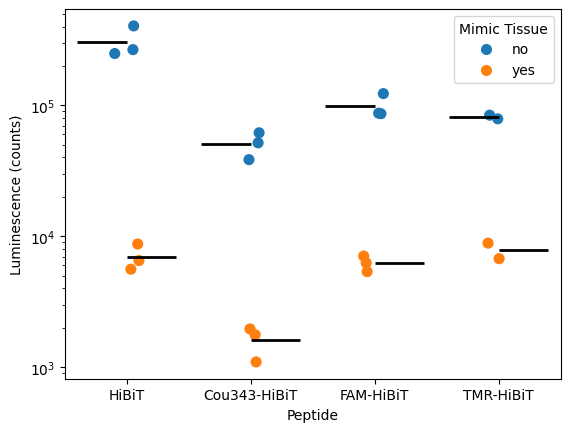

In [17]:
# Rename some columns and indicies for publication
tidy = tidy.rename(columns={
    'sample': 'Peptide',
    'light emission': 'Luminescence (counts)',
    'Ham': 'Mimic Tissue',
})
tidy = tidy.set_index('Peptide')
tidy = tidy.rename(index={
    'NanoBiT': 'HiBiT',
    'NanoBiT Cou343': 'Cou343-HiBiT',
    'NanoBiT FAM': 'FAM-HiBiT',
    'NanoBiT TAMRA': 'TMR-HiBiT',
})
tidy = tidy.reset_index()

ax = sns.stripplot(tidy, x='Peptide', y='Luminescence (counts)', hue='Mimic Tissue', size=8)
# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="Peptide",
            y="Luminescence (counts)",
            data=tidy,
            showfliers=False,
            showbox=False,
            showcaps=False,
            hue='Mimic Tissue',
            legend=False,
            ax=ax)
plt.yscale('log')
# export PDF
plt.savefig('/content/gdrive/MyDrive/Rathbun lab GDrive/Prof Rathbun/mimic tissue BRET/ham vs no ham RLU.pdf')